In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#пути к файлам csv с обучающим и тестовым датасетами

TRAIN_DATASET_PATH = 'C:/Users/sklod/OneDrive/Рабочий стол/STUDY/!PRACTICUM/Q3.Data_Analysis/Project_regression/train.csv'
TEST_DATASET_PATH = 'C:/Users/sklod/OneDrive/Рабочий стол/STUDY/!PRACTICUM/Q3.Data_Analysis/Project_regression/test.csv'

In [3]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [4]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# информация по признакам и типам в обучающем и тестовом датасете соответствует, за исключением mean_exam_points

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [7]:
#пропусков нет

#train_df.isnull().sum()
test_df.isnull().sum()

Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
dtype: int64

In [8]:
train_df.describe()
#test_df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,63.737300
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,14.705574
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


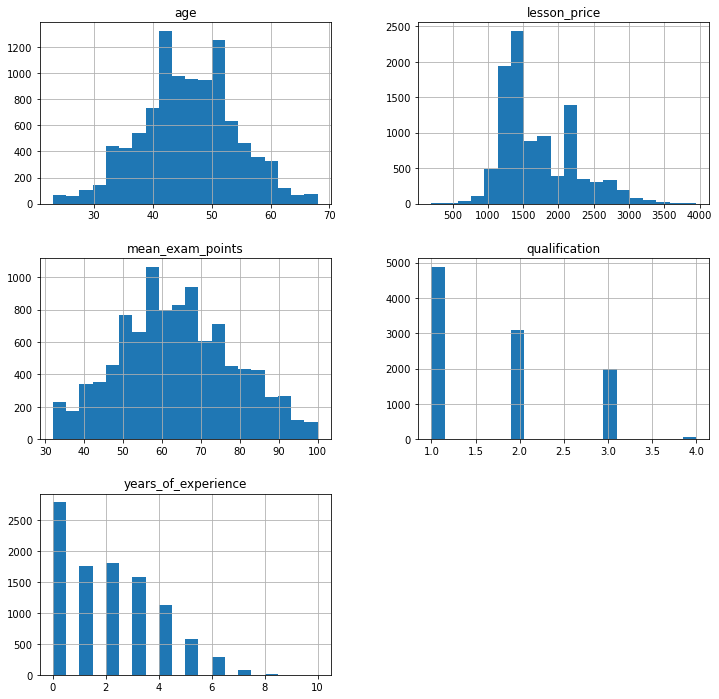

In [9]:
#еще раз наглядно убедимся, что нет никаких существенных выбросов

features = ['age','years_of_experience','lesson_price','qualification','mean_exam_points']
train_df[features].hist(figsize=(12,12), bins=20);

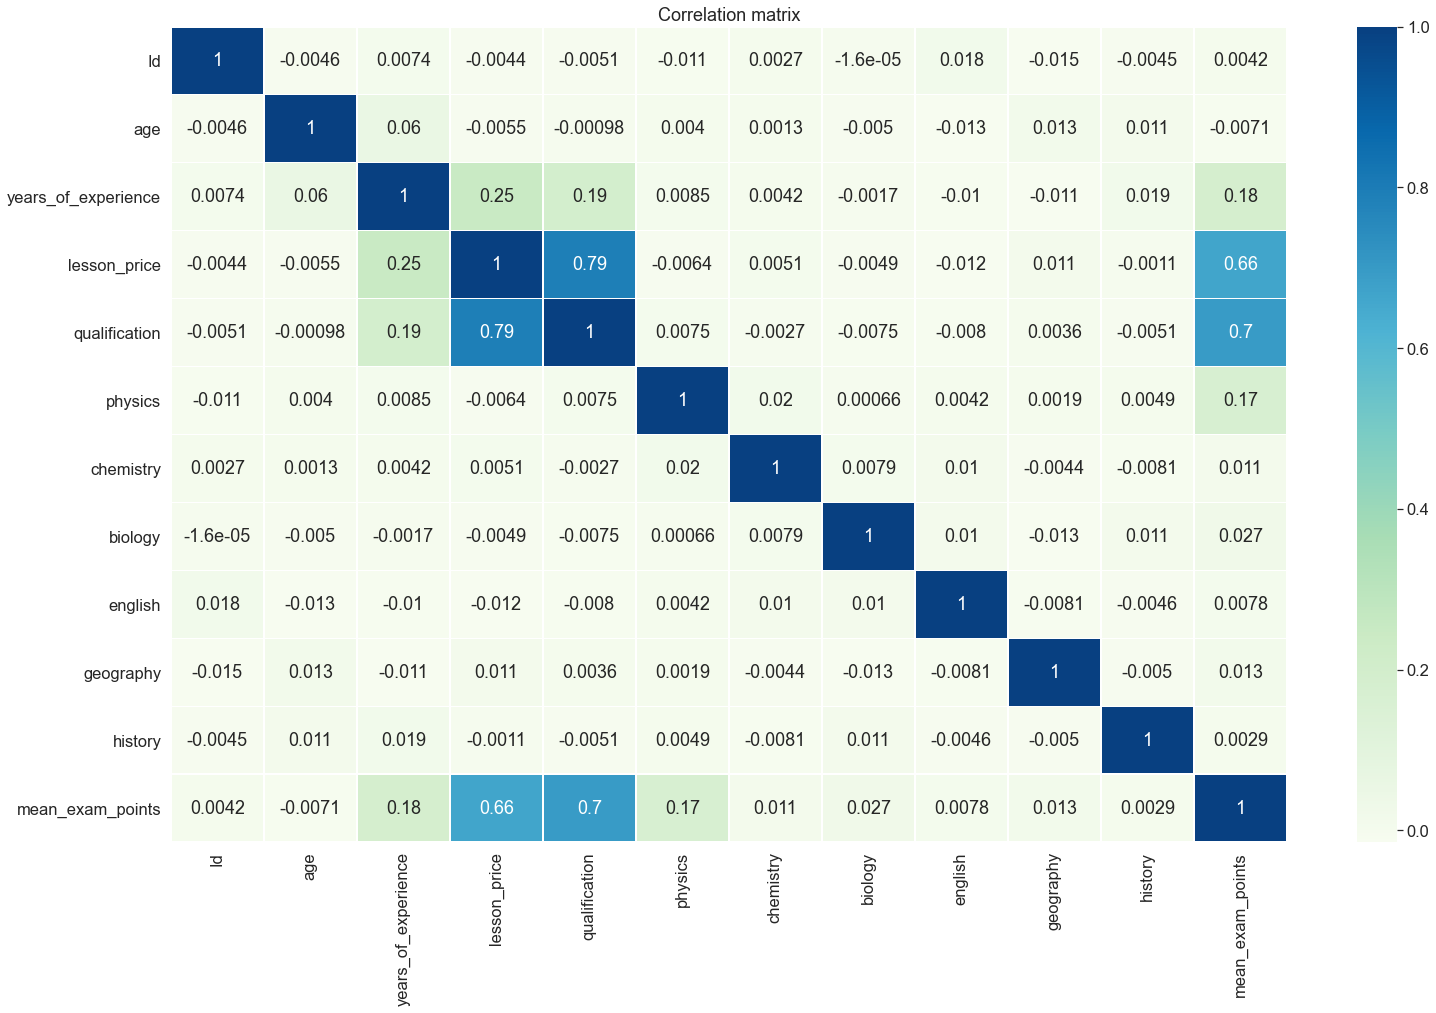

In [10]:
# изучим степень корреляции всех признаков между собой и с целевой переменной.

plt.figure(figsize = (25,15))

sns.set(font_scale=1.5)
sns.heatmap(train_df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

Как мы видем, высоко коррелируют квилификация, стоимость урока и, соответственно, балл на экзамене.

Возмем на оценочный показатель метрику R2

In [11]:
def calc_r2_score(true, pred):
    r2 = 1 - (np.sum((true-pred)**2)/np.sum((true - np.mean(true))**2))
    return r2

In [12]:
def evaluate_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = 1 - (np.sum((y_train-y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2))
    r2_test = 1 - (np.sum((y_test-y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2))
    print(f'R2 score train: {r2_train}, R2 score test: {r2_test}')

In [13]:
# Я решила оставить все признаки, кроме ID

features = train_df.columns.drop('Id').drop('mean_exam_points')
target = train_df['mean_exam_points']
X = np.array(train_df[features])
y = np.array(target)

In [14]:
# Сделаем разбиение на обучающую и валидационную выборку в рамках тренировочного набора данных

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle= True, stratify=y, random_state = 1)


## Гадиентный бустинг

In [15]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [16]:
class Leaf:
    
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
        self.prediction = self.predict()
        
    def predict(self):
        return self.targets.mean()

In [17]:
class RegressionTree:
    
    def __init__(self, max_depth = 50, depth = 0):
        self.max_depth = max_depth
        self.depth = depth
        self.tree=None
        
    def criterion(self, targets):
        # критерии и в задаче регрессии, и в задаче классификации должен стремиться к 0
        return np.mean((targets - targets.mean())**2)
    
    def gain(self, left_targets, right_targets, root):

        # доля выборки, ушедшая в левое поддерево
        p = float(left_targets.shape[0]) / (left_targets.shape[0] + right_targets.shape[0])

        return root - p * self.criterion(left_targets) - (1 - p) * self.criterion(right_targets) 
    
    def get_subsample(self, len_sample):
        # выводим индексы признаков
        sample_indexes = list(range(len_sample))
        
        # В задаче регрессии рекомендовали создавать выборку = кол-во признаков/3
        len_subsample = int(len_sample/3)

        subsample = np.random.choice(sample_indexes, size=len_subsample, replace=False)

        return subsample
    
    def split(self, data, targets, index, t):
        
        left = np.where(data[:, index] <= t) # t - порог вопроса
        right = np.where(data[:, index] > t)
        
        true_data = data[left]
        false_data = data[right]
        true_targets = targets[left]
        false_targets = targets[right]
        
        return true_data, false_data, true_targets, false_targets
        
    def find_best_split(self, data, targets):
        
        min_samples_leaf = 5
        
        root = self.criterion(targets)
        best_gain = 0
        best_t = None
        best_index = None

        n_features = data.shape[1]
        subsample = self.get_subsample(n_features)
        
        for index in subsample:
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique(data[:, index])

            for t in t_values:
                
                true_data, false_data, true_targets, false_targets = self.split(data, targets, index, t)
                
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < min_samples_leaf or len(false_data) < min_samples_leaf:
                    continue

                current_gain = self.gain(true_targets, false_targets, root)

                #  выбираем порог, на котором получается максимальный прирост качества
                if current_gain > best_gain:
                    best_gain, best_t, best_index = current_gain, t, index

        return best_gain, best_t, best_index
    
    def build_tree(self, data, targets, depth, max_depth):
        
        gain, t, index = self.find_best_split(data, targets)
        
        if gain == 0 or depth > max_depth:
            return Leaf(data, targets)
        
        depth +=1
        
        true_data, false_data, true_targets, false_targets = self.split(data, targets, index, t)
        
        true_branch = self.build_tree(true_data, true_targets, depth, max_depth)
        false_branch = self.build_tree(false_data, false_targets, depth, max_depth)
        
        return Node(index, t, true_branch, false_branch)

    def predict_object(self, obj, node):
         
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer
        if obj[node.index] <= node.t:
            return self.predict_object(obj, node.true_branch)
        else:
            return self.predict_object(obj, node.false_branch)
    
    def predict(self, data):
        pred_values = []
        for obj in data:
            prediction = self.predict_object(obj, self.tree)
            pred_values.append(prediction)
        return pred_values
    
    def fit(self, data, targets):
        self.tree = self.build_tree(data, targets,  self.depth, self.max_depth)
        return self

In [19]:
RT = RegressionTree(max_depth=10)
evaluate_model(X_train, y_train, X_test, y_test, RT)

R2 score train: 0.6747716467818295, R2 score test: 0.6197498857420092


In [20]:
class GB:
    
    def __init__(self, n_trees, max_depth, eta):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.eta = eta
        self.trees = []

    def residual(self, y, z):
        return 2*(y - z)

    def fit(self, X, y):
        for i in range(self.n_trees):
            tree = RegressionTree(max_depth = self.max_depth)

            # первый алгоритм просто обучаем на выборке и добавляем в список
            if len(self.trees) == 0:
                # обучаем первое дерево на обучающей выборке
                tree.fit(X, y)

            else:
                # Получим ответы на текущей композиции
                targets = self.predict(X)

                # алгоритмы начиная со второго обучаем на сдвиг
                tree.fit(X, self.residual(y, targets))
                
            self.trees.append(tree)
        return self.trees

    def predict(self, X):
        predictions = np.array([sum([self.eta * alg.predict([x])[0] for alg in self.trees]) for x in X])
        return predictions

In [28]:
n_trees = 100
max_depth = 5
eta = 0.1


gb_model = GB(n_trees = n_trees, max_depth = max_depth, eta = eta)

In [27]:
evaluate_model(X_train, y_train, X_test, y_test, gb_model)

R2 score train: 0.7312589029788646, R2 score test: 0.6341235225826047


Увеличение eta и количества деревьев приводит к переобучению - мадель дает более высокий результат на трэйне, но не улучшает результат на валидационной выборке. 